In [8]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
img = image.load_img("test-images/casual-shirt.jpg", target_size = (224, 224))

img_array = image.img_to_array(img)
print(img_array.shape)

(224, 224, 3)


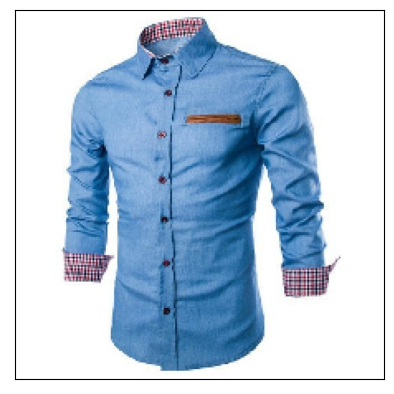

In [3]:
plt.imshow(img_array/255)
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
expanded_img_array = np.expand_dims(img_array, axis=0)
print(expanded_img_array.shape)
expanded_img_array

(1, 224, 224, 3)


array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [9]:
model = ResNet50(weights="imagenet", include_top = False, input_shape = (224, 224, 3))
model.trainable = False

model = Sequential([
    model,
    GlobalMaxPooling2D(),
])

In [19]:
# images are converted to BGR from RGB and every image is converted to 0 centered.
preprocessed_img = preprocess_input(expanded_img_array)
print(preprocessed_img.shape)
preprocessed_img

(1, 224, 224, 3)


array([[[[47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         ...,
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007]],

        [[47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         ...,
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007]],

        [[47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         ...,
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007]],

        ...,

        [[47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         [47.122   , 21.442009,  7.640007],
         ...,


In [20]:
# lets see the output of the model on this image
model.predict(preprocessed_img)  # here 2048 numbers in this result

array([[5.909199 , 9.437414 , 2.1879075, ..., 3.659141 , 4.5075283,
        7.586256 ]], dtype=float32)

In [21]:
# convert the result to the 1D. basically flatten the result
model.predict(preprocessed_img).flatten()

array([5.909199 , 9.437414 , 2.1879075, ..., 3.659141 , 4.5075283,
       7.586256 ], dtype=float32)

In [22]:
# now normalize the result (into 0-1 range)
model.predict(preprocessed_img).flatten()/np.linalg.norm(model.predict(preprocessed_img).flatten())

array([0.0194276 , 0.03102726, 0.00719315, ..., 0.01203011, 0.01481934,
       0.02494123], dtype=float32)

In [23]:
np.linalg.norm(model.predict(preprocessed_img).flatten())

304.16522

In [24]:
# what is norm? Here is the formula
np.sqrt(np.dot(model.predict(preprocessed_img).flatten(), model.predict(preprocessed_img).flatten()))

304.16522